**LEVEL_2 - TASK_2**

**WINE QUALITY PREDICTION**

In [249]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [250]:
df = pd.read_csv('WineQT.csv')

In [251]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)
print("Columns:", list(df.columns))

Columns: ['unnamed:_0', 'unnamed:_0', 'unnamed:_0.2', 'unnamed:_0.1', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality', 'quality_label', 'sulfur_ratio', 'acidity_ratio']


In [252]:
display(df.head(8))

,unnamed:_0,unnamed:_0,unnamed:_0.2,unnamed:_0.1,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label,sulfur_ratio,acidity_ratio
0,0,0,0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low,0.323529,10.571429
1,1,1,1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low,0.373134,8.863636
2,2,2,2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low,0.277778,10.263158
3,3,3,3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium,0.283333,40.000000
4,4,4,4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low,0.323529,10.571429
5,5,5,5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Low,0.325000,11.212121
6,6,6,6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Low,0.254237,13.166667
7,7,7,7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Medium,0.714286,11.230769


In [253]:
print("Info:")
display(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed:_0            1143 non-null   int64  
 1   unnamed:_0            1143 non-null   int64  
 2   unnamed:_0.2          1143 non-null   int64  
 3   unnamed:_0.1          1143 non-null   int64  
 4   fixed_acidity         1143 non-null   float64
 5   volatile_acidity      1143 non-null   float64
 6   citric_acid           1143 non-null   float64
 7   residual_sugar        1143 non-null   float64
 8   chlorides             1143 non-null   float64
 9   free_sulfur_dioxide   1143 non-null   float64
 10  total_sulfur_dioxide  1143 non-null   float64
 11  density               1143 non-null   float64
 12  ph                    1143 non-null   float64
 13  sulphates             1143 non-null   float64
 14  alcohol               1143 non-null   float64
 15  quality        

None

In [254]:
print("Describe (numeric):")
display(df.describe().T)

Describe (numeric):


,count,mean,std,min,25%,50%,75%,max
unnamed:_0,1143.0,571.000000,330.099985,0.000000,285.500000,571.000000,856.500000,1142.000000
unnamed:_0,1143.0,571.000000,330.099985,0.000000,285.500000,571.000000,856.500000,1142.000000
unnamed:_0.2,1143.0,571.000000,330.099985,0.000000,285.500000,571.000000,856.500000,1142.000000
unnamed:_0.1,1143.0,571.000000,330.099985,0.000000,285.500000,571.000000,856.500000,1142.000000
fixed_acidity,1143.0,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile_acidity,1143.0,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric_acid,1143.0,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual_sugar,1143.0,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.0,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free_sulfur_dioxide,1143.0,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000


In [255]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


unnamed:_0              0
unnamed:_0              0
unnamed:_0.2            0
unnamed:_0.1            0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
sulfur_ratio            0
acidity_ratio           0
dtype: int64

In [256]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


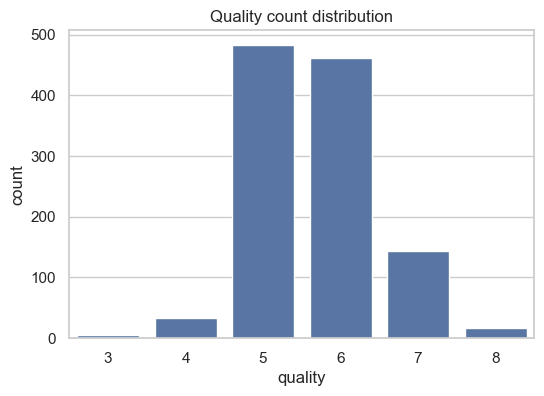

In [257]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Quality count distribution')
plt.show()

In [258]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['unnamed:_0', 'unnamed:_0', 'unnamed:_0.2', 'unnamed:_0.1', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality', 'sulfur_ratio', 'acidity_ratio']


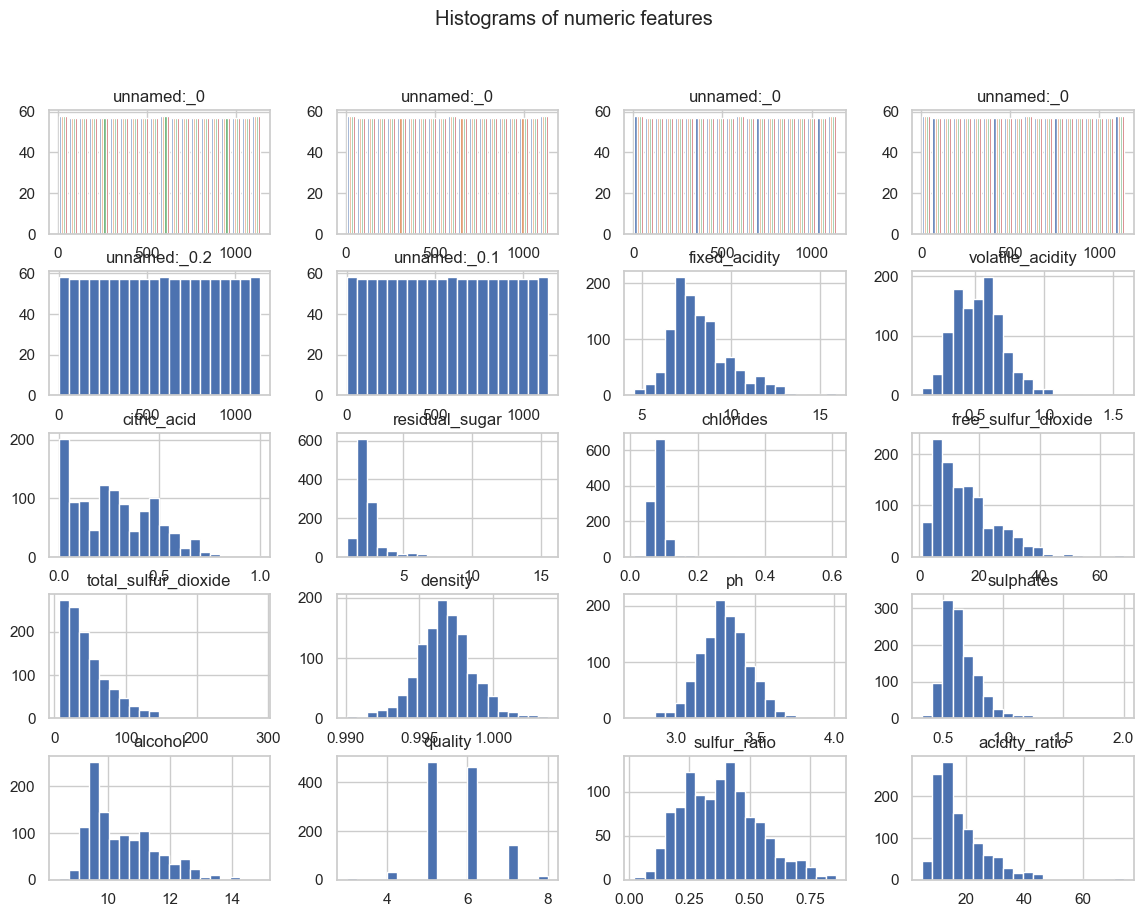

In [259]:
df[numeric_cols].hist(bins=20, figsize=(14,10))
plt.suptitle('Histograms of numeric features')
plt.show()

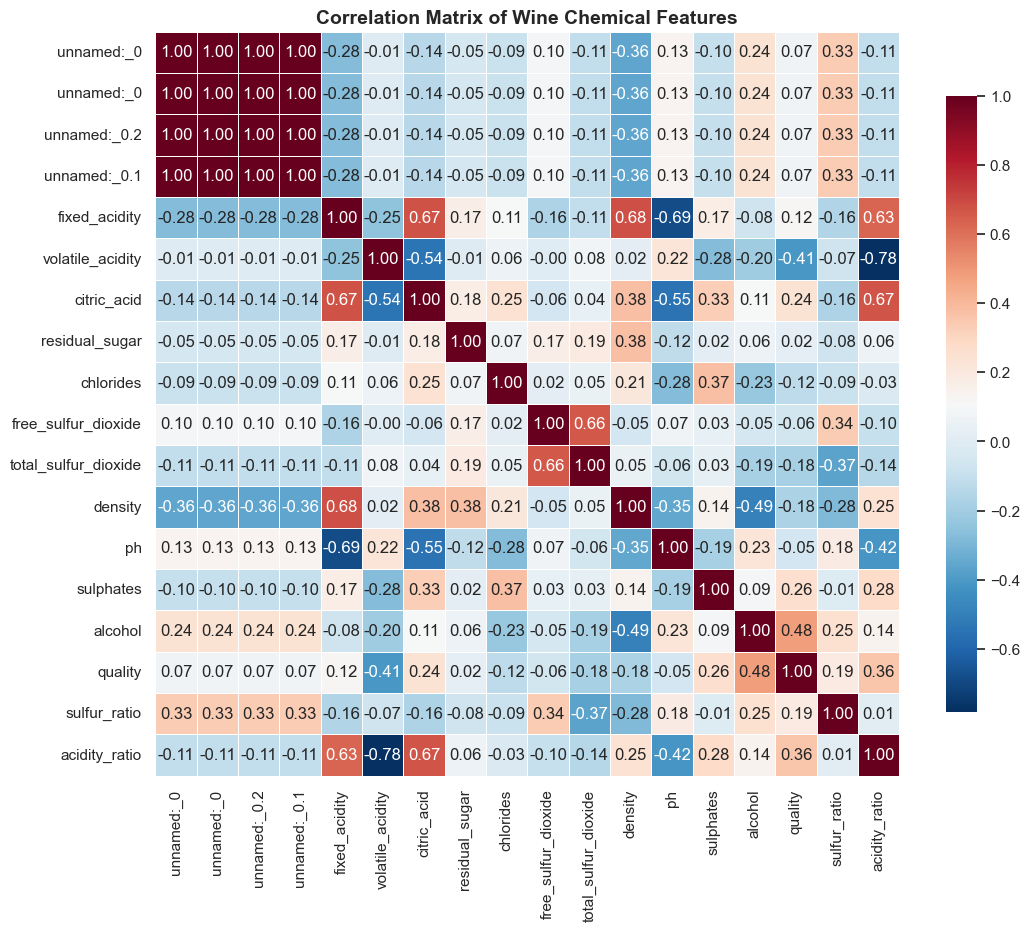

In [260]:
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='RdBu_r',  
    square=True, 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix of Wine Chemical Features", fontsize=14, fontweight='bold')
plt.show()


In [261]:
if 'id' in df.columns:
    print("Dropping 'id' column.")
    df = df.drop(columns=['id'])

In [262]:
if df['quality'].dtype == 'O':
    df['quality'] = pd.to_numeric(df['quality'], errors='coerce')

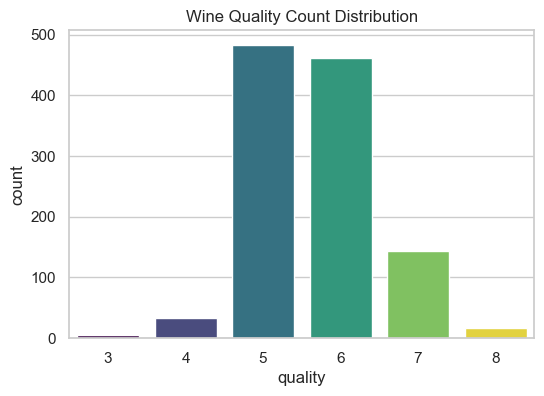

In [263]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='quality', data=df, hue='quality', palette='viridis', dodge=False)
plt.title('Wine Quality Count Distribution')
ax.get_legend().remove()  
plt.show()

In [264]:
quality_counts = df['quality'].value_counts(normalize=True) * 100
print("Quality percentage distribution:\n", quality_counts.sort_index())

Quality percentage distribution:
 quality
3     0.524934
4     2.887139
5    42.257218
6    40.419948
7    12.510936
8     1.399825
Name: proportion, dtype: float64


In [265]:
quality_corr = corr['quality'].sort_values(ascending=False)
print("Top positive correlations:\n", quality_corr[1:6])

Top positive correlations:
 alcohol          0.484866
acidity_ratio    0.355357
sulphates        0.257710
citric_acid      0.240821
sulfur_ratio     0.186621
Name: quality, dtype: float64


In [266]:
print("Top negative correlations:\n", quality_corr[-5:])

Top negative correlations:
 free_sulfur_dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total_sulfur_dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64


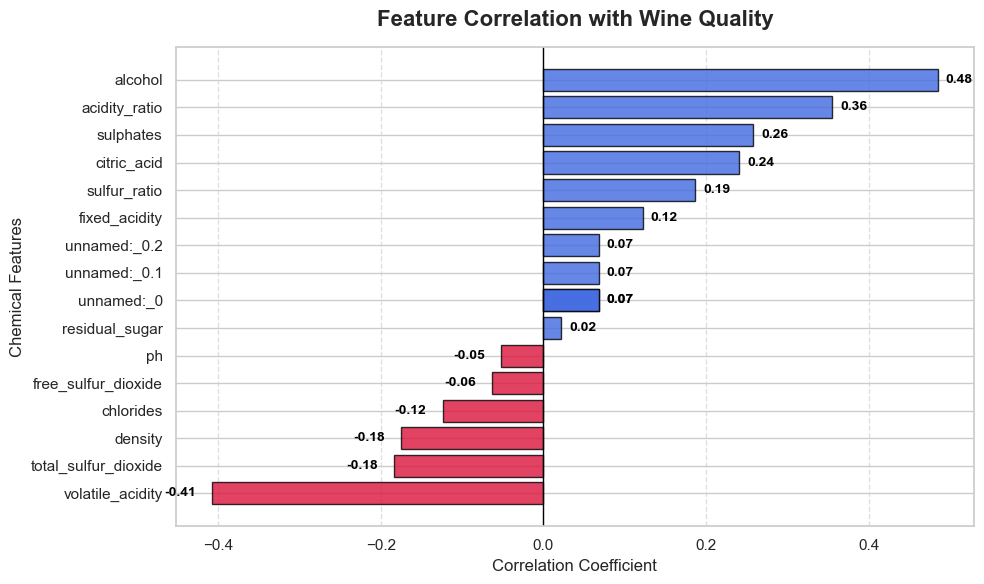

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sorted_corr = quality_corr.drop('quality').sort_values()
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
colors = sorted_corr.apply(lambda x: 'royalblue' if x > 0 else 'crimson')
bars = plt.barh(sorted_corr.index, sorted_corr.values, color=colors, edgecolor='black', alpha=0.8)
for bar in bars:
    plt.text(
        bar.get_width() + (0.01 if bar.get_width() > 0 else -0.02),  # dynamic positioning
        bar.get_y() + bar.get_height()/2,
        f"{bar.get_width():.2f}",
        va='center',
        ha='left' if bar.get_width() > 0 else 'right',
        fontsize=10,
        fontweight='bold',
        color='black'
    )
plt.title('Feature Correlation with Wine Quality', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Chemical Features', fontsize=12)
plt.axvline(0, color='black', linewidth=1)  
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


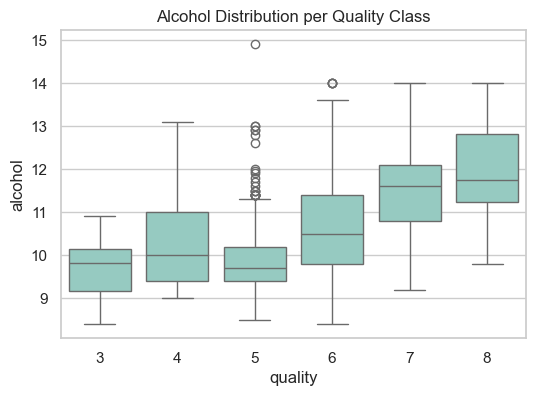

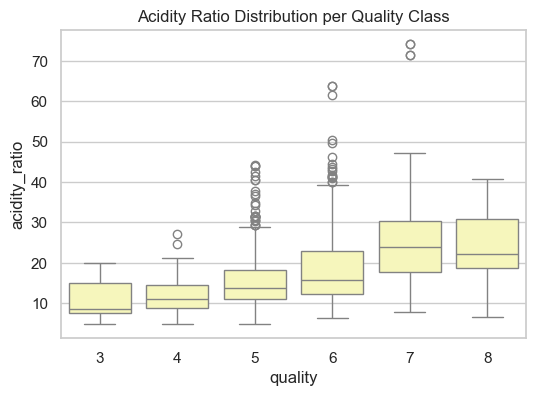

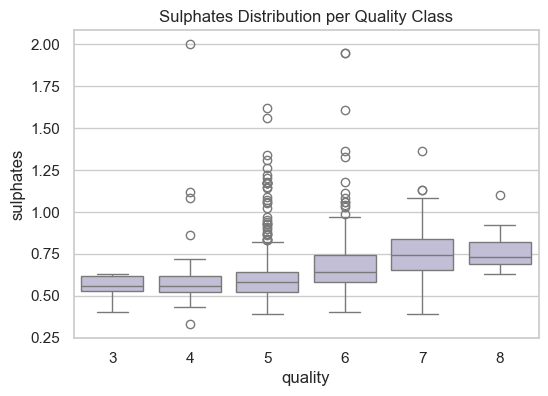

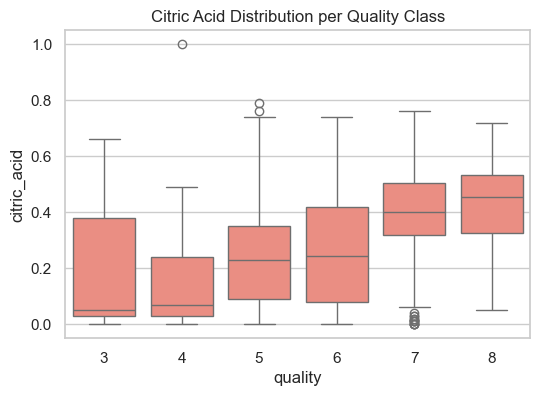

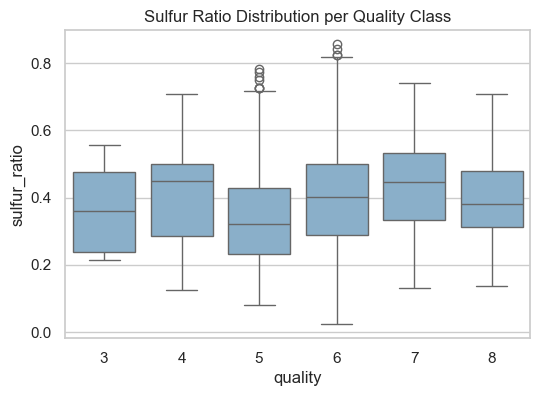

In [268]:
palette = sns.color_palette("Set3", len(top_features))
for i, col in enumerate(top_features):
    if col not in df.columns:
        print(f"Feature '{col}' not found in dataset, skipping.")
        continue

    plt.figure(figsize=(6,4))
    sns.boxplot(x='quality', y=col, data=df, color=palette[i])
    plt.title(f"{col.replace('_',' ').title()} Distribution per Quality Class")
    plt.show()

In [269]:
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
df['quality_label'] = pd.cut(df['quality'], bins=bins, labels=labels, right=True)

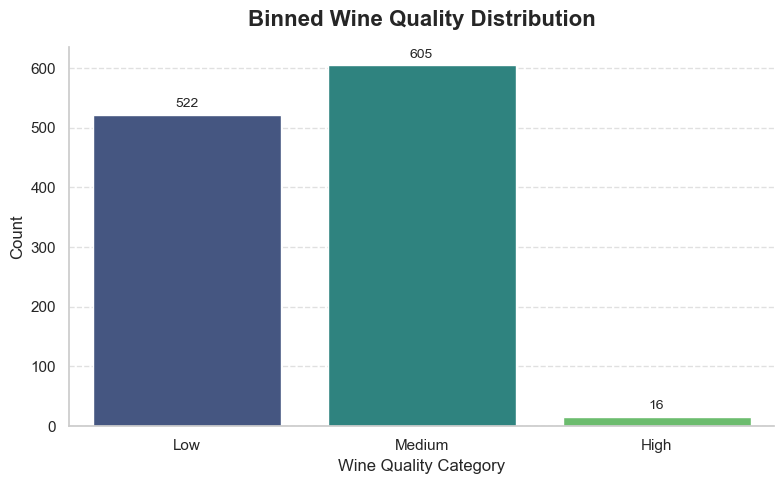

In [270]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='quality_label', hue='quality_label', data=df, 
                   palette='viridis', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.title('Binned Wine Quality Distribution', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Wine Quality Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [271]:
df['sulfur_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide'].replace(0, np.nan)
df['acidity_ratio'] = df['fixed_acidity'] / df['volatile_acidity'].replace(0, np.nan)

In [272]:
print("Correlation of new features with quality:")
display(df[['sulfur_ratio','acidity_ratio','quality']].corr()['quality'].sort_values(ascending=False))

Correlation of new features with quality:


quality          1.000000
acidity_ratio    0.355357
sulfur_ratio     0.186621
Name: quality, dtype: float64

In [273]:
df['sulfur_ratio'] = df['sulfur_ratio'].fillna(df['sulfur_ratio'].median())
df['acidity_ratio'] = df['acidity_ratio'].fillna(df['acidity_ratio'].median())

In [274]:
df.to_csv("WineQT.csv")
print("Saved dataset with new features for modeling.")

Saved dataset with new features for modeling.


**MODEL PREPARATION AND TRAINING**

In [275]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


FEATURE AND TARGET SELECTION

In [276]:
feature_cols = df.columns.difference(['quality', 'quality_label'])
X = df[feature_cols]
y = df['quality']

In [277]:
print("Features:", X.columns.tolist())
print("Target:", y.name)

Features: ['acidity_ratio', 'alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide', 'ph', 'residual_sugar', 'sulfur_ratio', 'sulphates', 'total_sulfur_dioxide', 'unnamed:_0', 'unnamed:_0', 'unnamed:_0.1', 'unnamed:_0.2', 'volatile_acidity']
Target: quality


In [278]:
print("Target distribution:\n", y.value_counts())

Target distribution:
 quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [279]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, \nTest samples: {X_test.shape[0]}")

Training samples: 914, 
Test samples: 229


In [280]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RANDOM FOREST CLASSIFIER

In [281]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [282]:
y_pred_rf = rf.predict(X_test)

In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.79      0.75        97
           6       0.63      0.68      0.66        92
           7       0.55      0.41      0.47        29
           8       0.00      0.00      0.00         3

    accuracy                           0.66       229
   macro avg       0.32      0.32      0.31       229
weighted avg       0.63      0.66      0.64       229



In [284]:
bins = [0, 5, 7, 10]  
labels = ['Low', 'Medium', 'High']
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

In [285]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

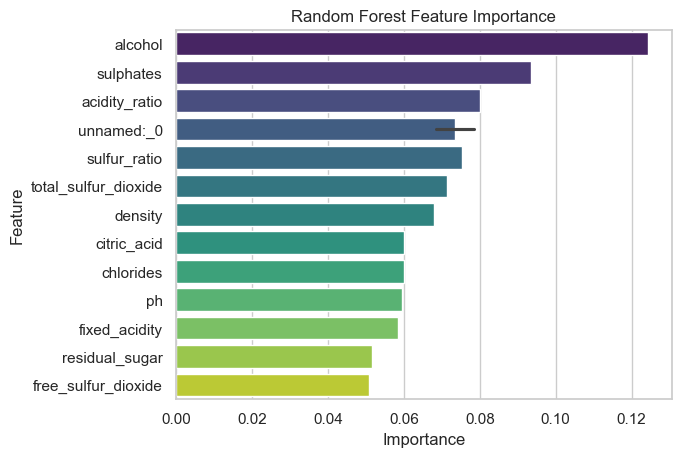

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df_importance = pd.DataFrame({
    'feature': X.columns[indices],
    'importance': importances[indices]
})

sns.barplot(
    x='importance', 
    y='feature', 
    data=df_importance, 
    hue='feature',        
    dodge=False,          
    palette='viridis',   
    legend=False         
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


STOCHASTIC GRADIENT DESCENT (SGD) CLASSIFIER

In [287]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [288]:
import numpy as np
print(np.unique(y_test))

[3 4 5 6 7 8]


In [289]:
sgd.fit(X_train_scaled, y_train)  

SGDClassifier(random_state=42)

In [290]:
y_pred_sgd = sgd.predict(X_test_scaled)
print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))

SGD Accuracy: 0.5676855895196506


In [291]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.87      0.73        97
           6       0.54      0.43      0.48        92
           7       0.30      0.21      0.24        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.25      0.25      0.24       229
weighted avg       0.52      0.57      0.54       229



In [292]:
import numpy as np
print("y_test distribution:", np.bincount(y_test))
print("y_pred_sgd distribution:", np.bincount(y_pred_sgd))

y_test distribution: [ 0  0  0  1  7 97 92 29  3]
y_pred_sgd distribution: [  0   0   0   0   0 132  74  20   3]


In [293]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(class_weight='balanced')

In [294]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Macro F1:", f1_score(y_test, y_pred_sgd, average='macro', zero_division=0))
print("Micro F1:", f1_score(y_test, y_pred_sgd, average='micro', zero_division=0))

Macro F1: 0.24340835402925312
Micro F1: 0.5676855895196506


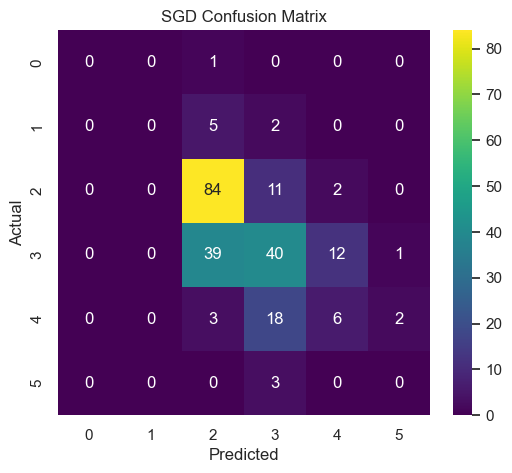

In [295]:
cm = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='viridis')
plt.title("SGD Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SUPPORT VECTOR CLASSIFIER

In [296]:
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [297]:
y_pred_svc = svc.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

SVC Accuracy: 0.6200873362445415


In [298]:
print(classification_report(y_test, y_pred_svc, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.78      0.73        97
           6       0.56      0.65      0.60        92
           7       0.55      0.21      0.30        29
           8       0.00      0.00      0.00         3

    accuracy                           0.62       229
   macro avg       0.30      0.27      0.27       229
weighted avg       0.58      0.62      0.59       229



In [299]:
print("Unique classes predicted by SVC:", np.unique(y_pred_svc))
print("Class distribution in test set:", y_test.value_counts())

Unique classes predicted by SVC: [5 6 7]
Class distribution in test set: quality
5    97
6    92
7    29
4     7
8     3
3     1
Name: count, dtype: int64


HYPERPARAMETER TUNING

In [300]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5,10]
}

In [302]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [303]:
print("Best RF params:", grid_rf.best_params_)

Best RF params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [304]:
print("Best CV score:", grid_rf.best_score_)

Best CV score: 0.6542965231489821


In [305]:
y_pred_best_rf = grid_rf.best_estimator_.predict(X_test)
print("Optimized RF Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Optimized RF Accuracy: 0.6637554585152838


In [306]:
chemical_features = [
    'density', 'fixed_acidity', 'volatile_acidity',
    'citric_acid', 'residual_sugar', 'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide',
    'pH', 'sulphates', 'alcohol'
]

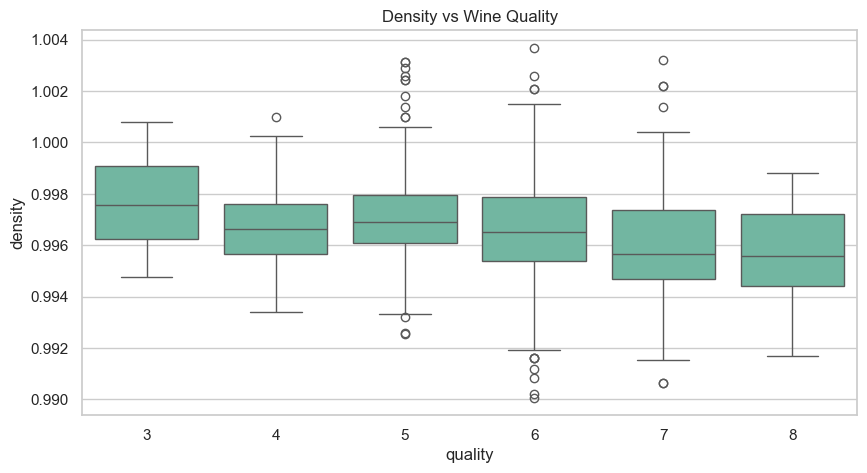

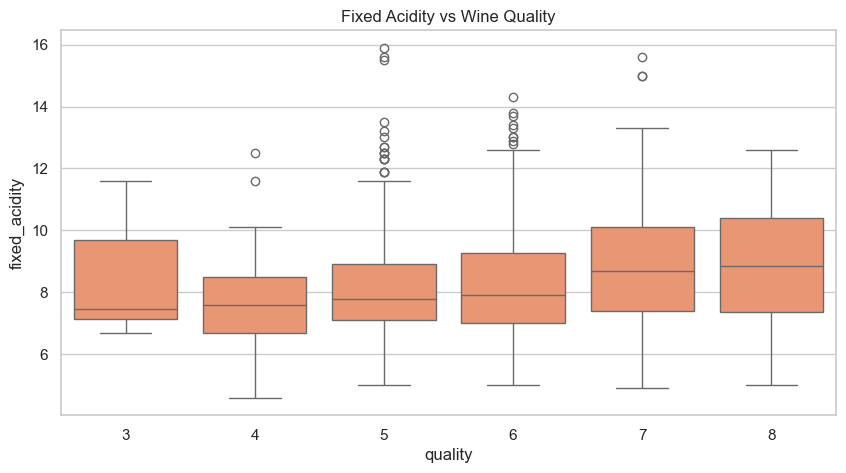

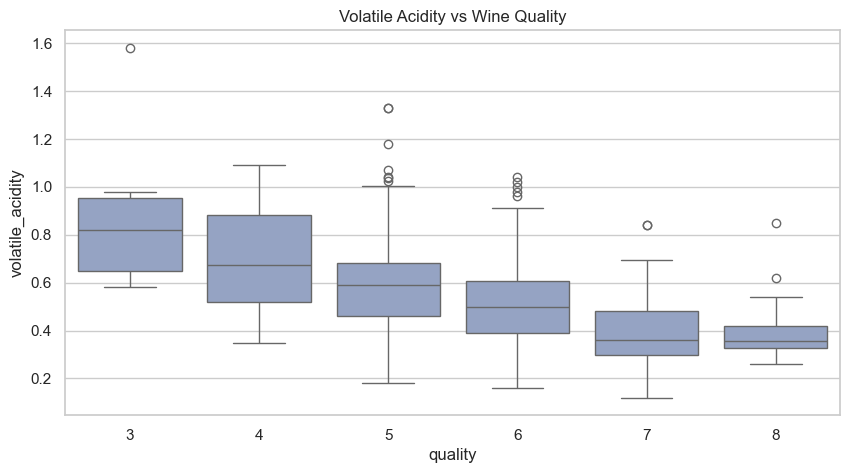

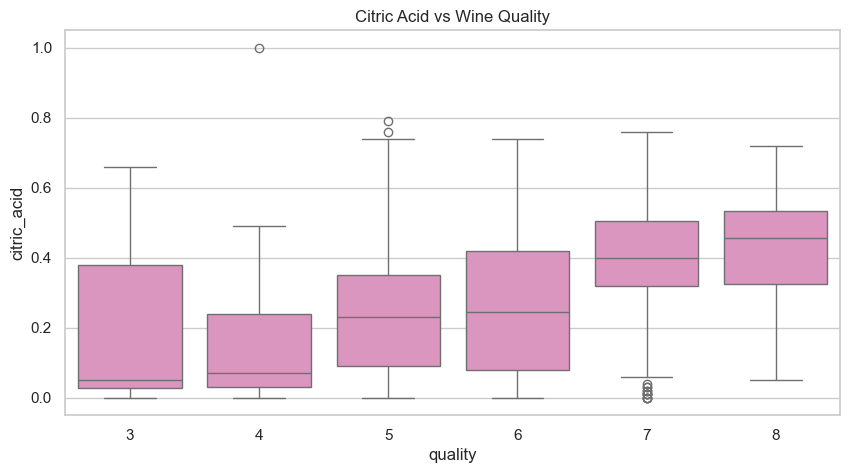

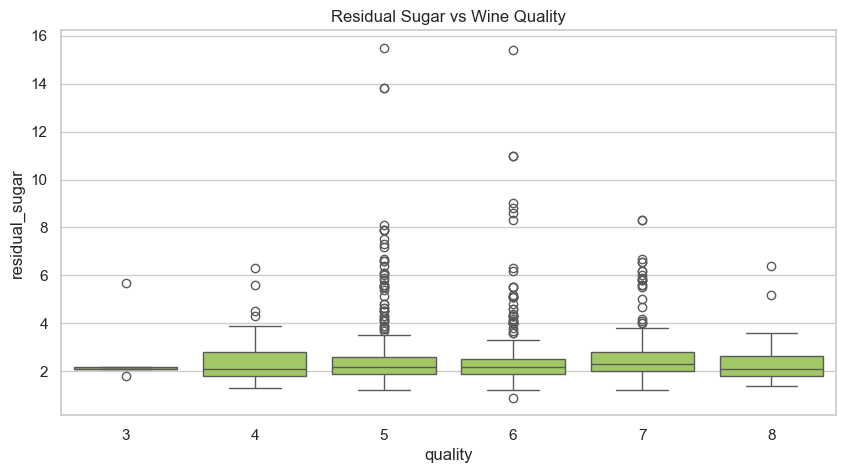

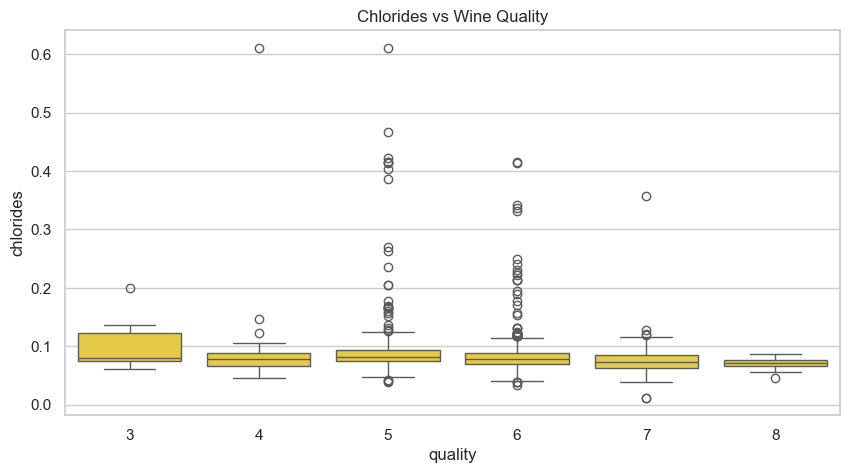

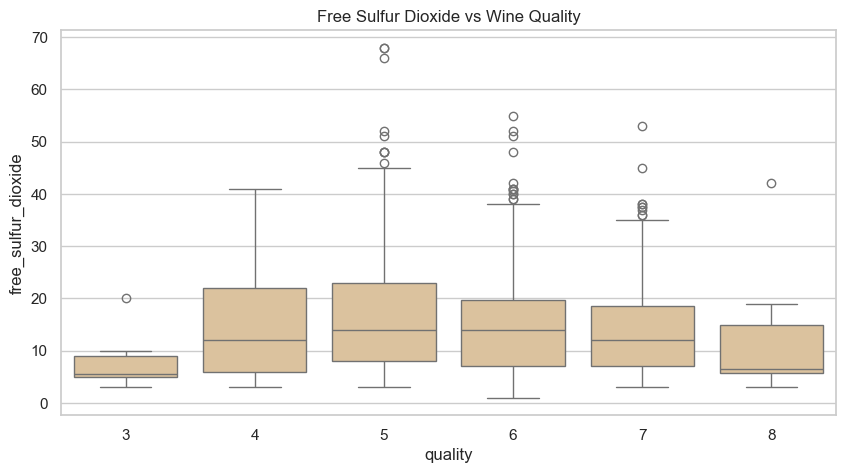

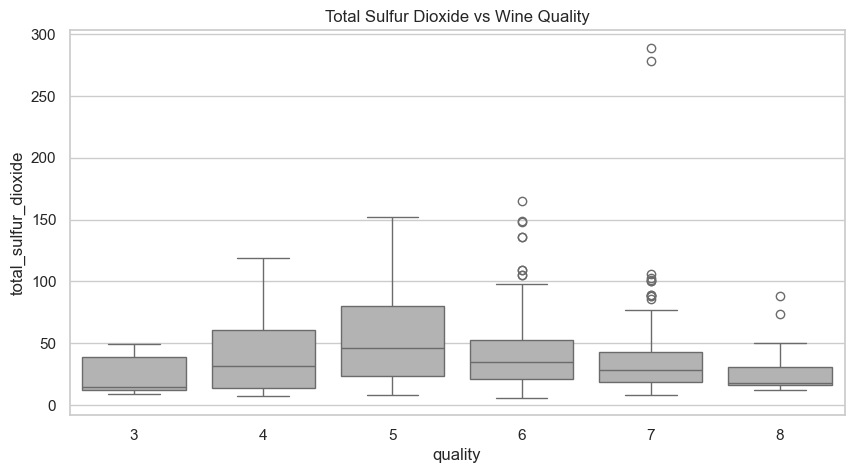

Feature 'pH' not found in dataset, skipping.


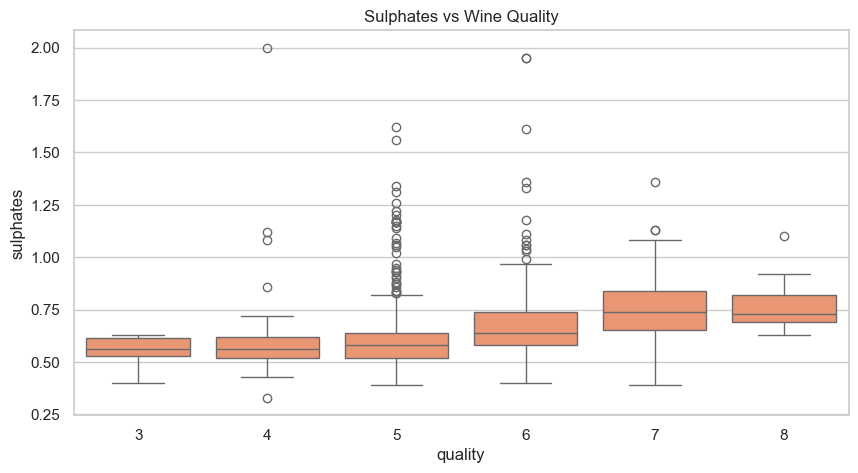

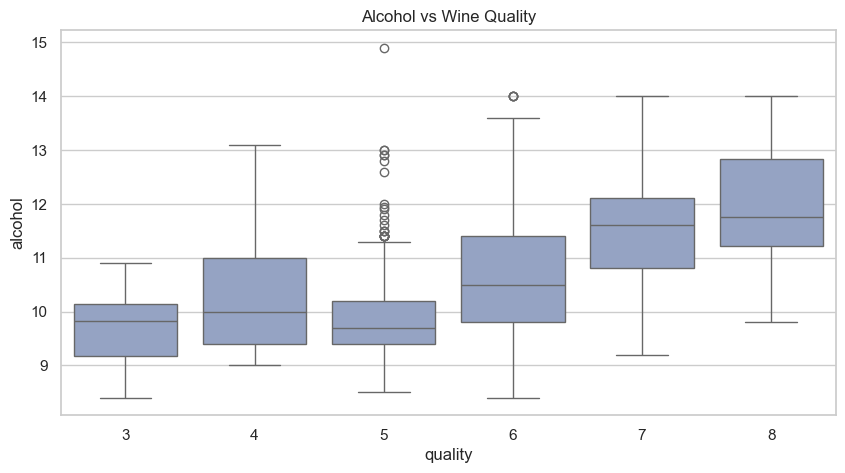

In [307]:
palette = sns.color_palette("Set2", len(chemical_features))
for i, feature in enumerate(chemical_features):
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in dataset, skipping.")
        continue
    
    plt.figure(figsize=(10,5))
    sns.boxplot(x='quality', y=feature, data=df, color=palette[i])
    plt.title(f"{feature.replace('_',' ').title()} vs Wine Quality")
    plt.show()

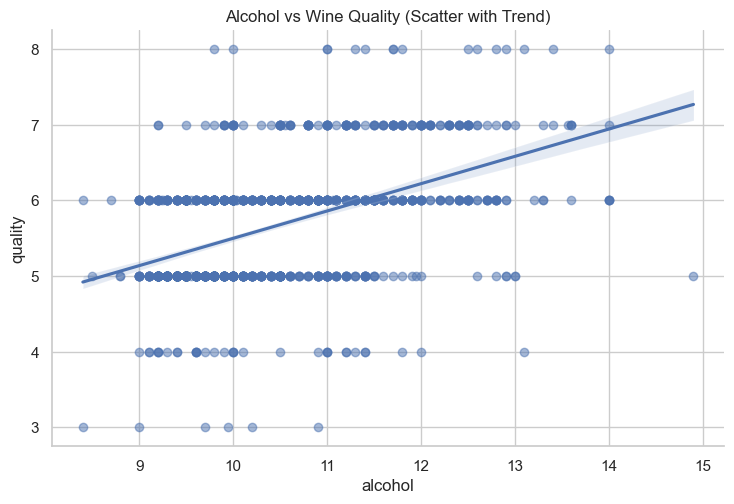

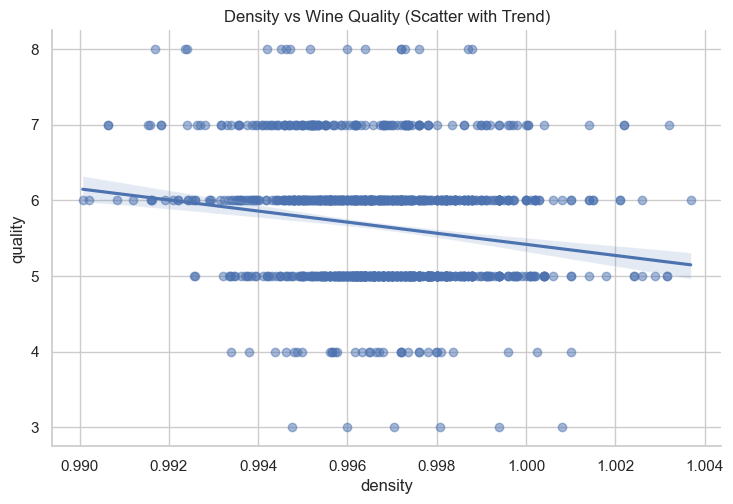

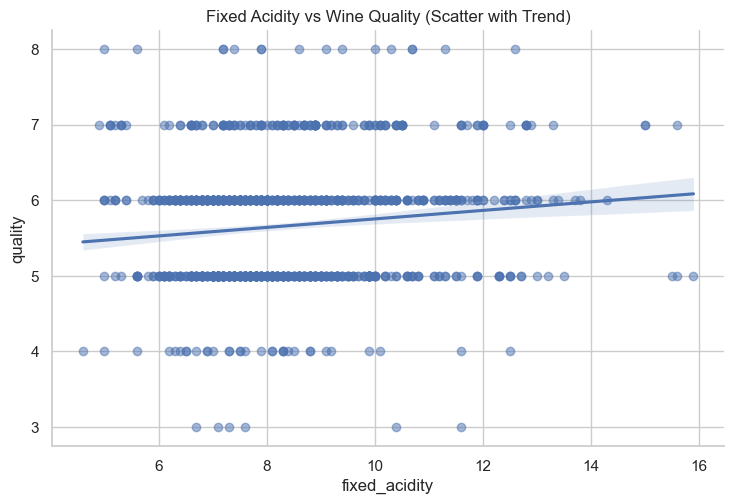

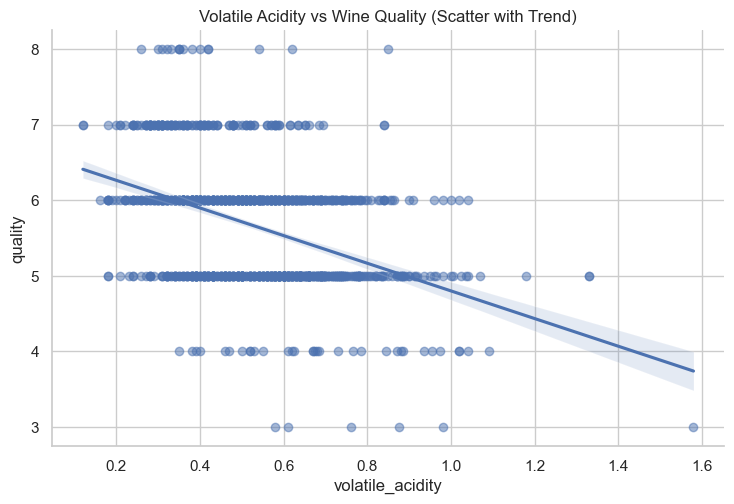

In [308]:
key_features = ['alcohol', 'density', 'fixed_acidity', 'volatile_acidity']
for feature in key_features:
    sns.lmplot(x=feature, y='quality', data=df, aspect=1.5, scatter_kws={'alpha':0.5})
    plt.title(f"{feature.replace('_',' ').title()} vs Wine Quality (Scatter with Trend)")
    plt.show()

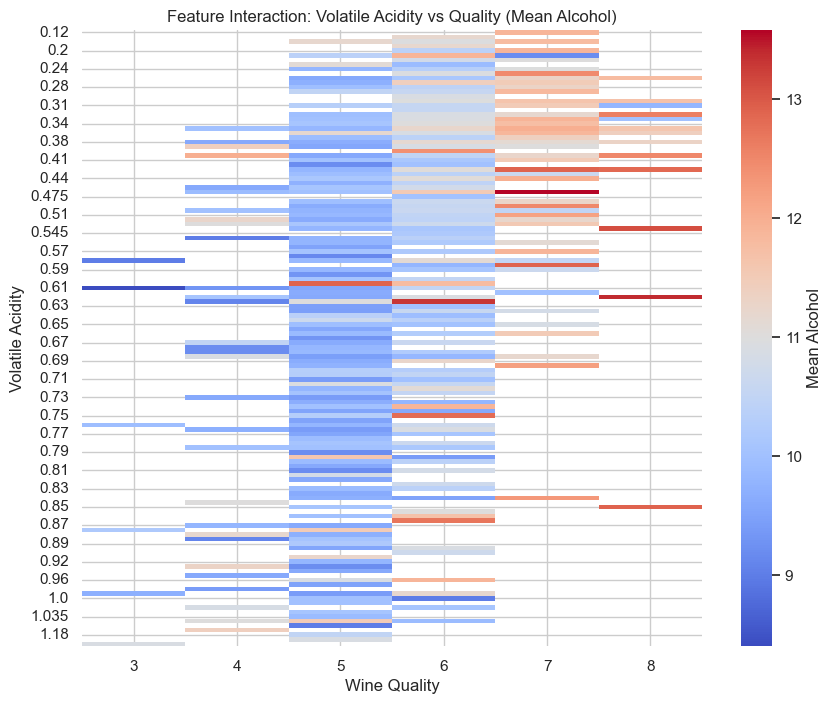

In [309]:
plt.figure(figsize=(10,8))
pivot = df.pivot_table(values='alcohol', index='volatile_acidity', columns='quality', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', cbar_kws={'label':'Mean Alcohol'})
plt.title('Feature Interaction: Volatile Acidity vs Quality (Mean Alcohol)')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.show()


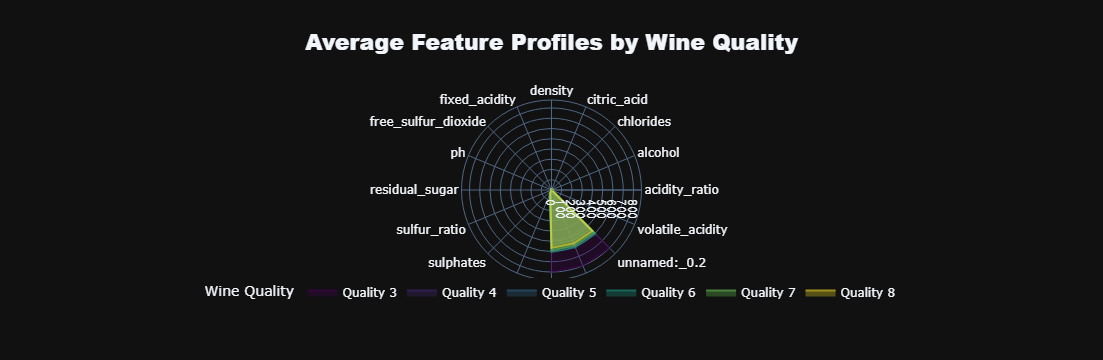

In [310]:
import plotly.graph_objects as go
import plotly.express as px
mean_profile = df.groupby('quality')[X_test.columns].mean()
categories = list(mean_profile.columns)
colors = px.colors.sequential.Viridis
num_qualities = len(mean_profile.index)
color_indices = np.linspace(0, len(colors)-1, num_qualities).astype(int)
fig = go.Figure()
for idx, q in enumerate(mean_profile.index):
    values = mean_profile.loc[q].tolist()
    values += [values[0]] 
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],
        fill='toself',
        name=f'Quality {q}',
        line=dict(color=colors[color_indices[idx]], width=2),
        opacity=0.6,
        hovertemplate='%{theta}: %{r}<extra></extra>'
    ))
fig.update_layout(
    title=dict(
        text="Average Feature Profiles by Wine Quality",
        x=0.5,
        font=dict(size=22, family='Arial Black')
    ),
    polar=dict(
        radialaxis=dict(visible=True, range=[0, mean_profile.max().max()*1.1],
                        tickfont=dict(size=12, family='Arial')),
        angularaxis=dict(tickfont=dict(size=12))
    ),
    legend=dict(
        title='Wine Quality',
        font=dict(size=12),
        orientation='h',
        yanchor='bottom',
        y=-0.15,
        xanchor='center',
        x=0.5
    ),
    showlegend=True,
    template='plotly_dark'
)
fig.show()

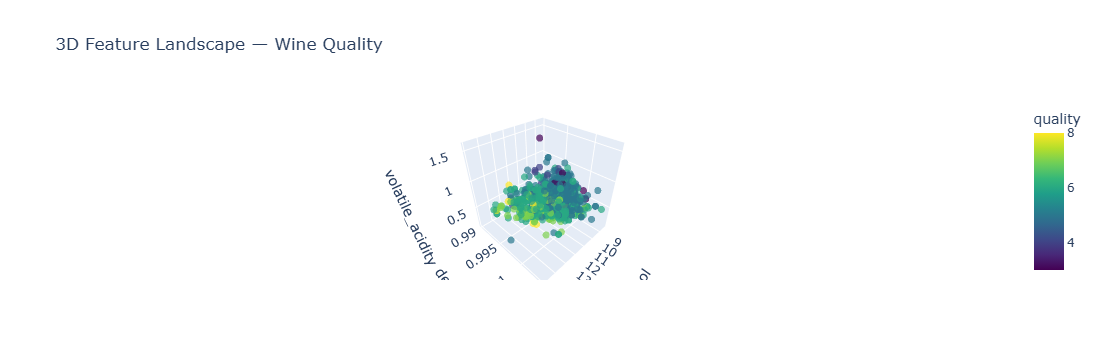

In [311]:
top3 = ['alcohol', 'density', 'volatile_acidity']
fig = px.scatter_3d(
    df, 
    x=top3[0], y=top3[1], z=top3[2],
    color='quality',
    color_continuous_scale='Viridis',
    opacity=0.7,
    title='3D Feature Landscape — Wine Quality'
)
fig.update_traces(marker=dict(size=4))
fig.show()

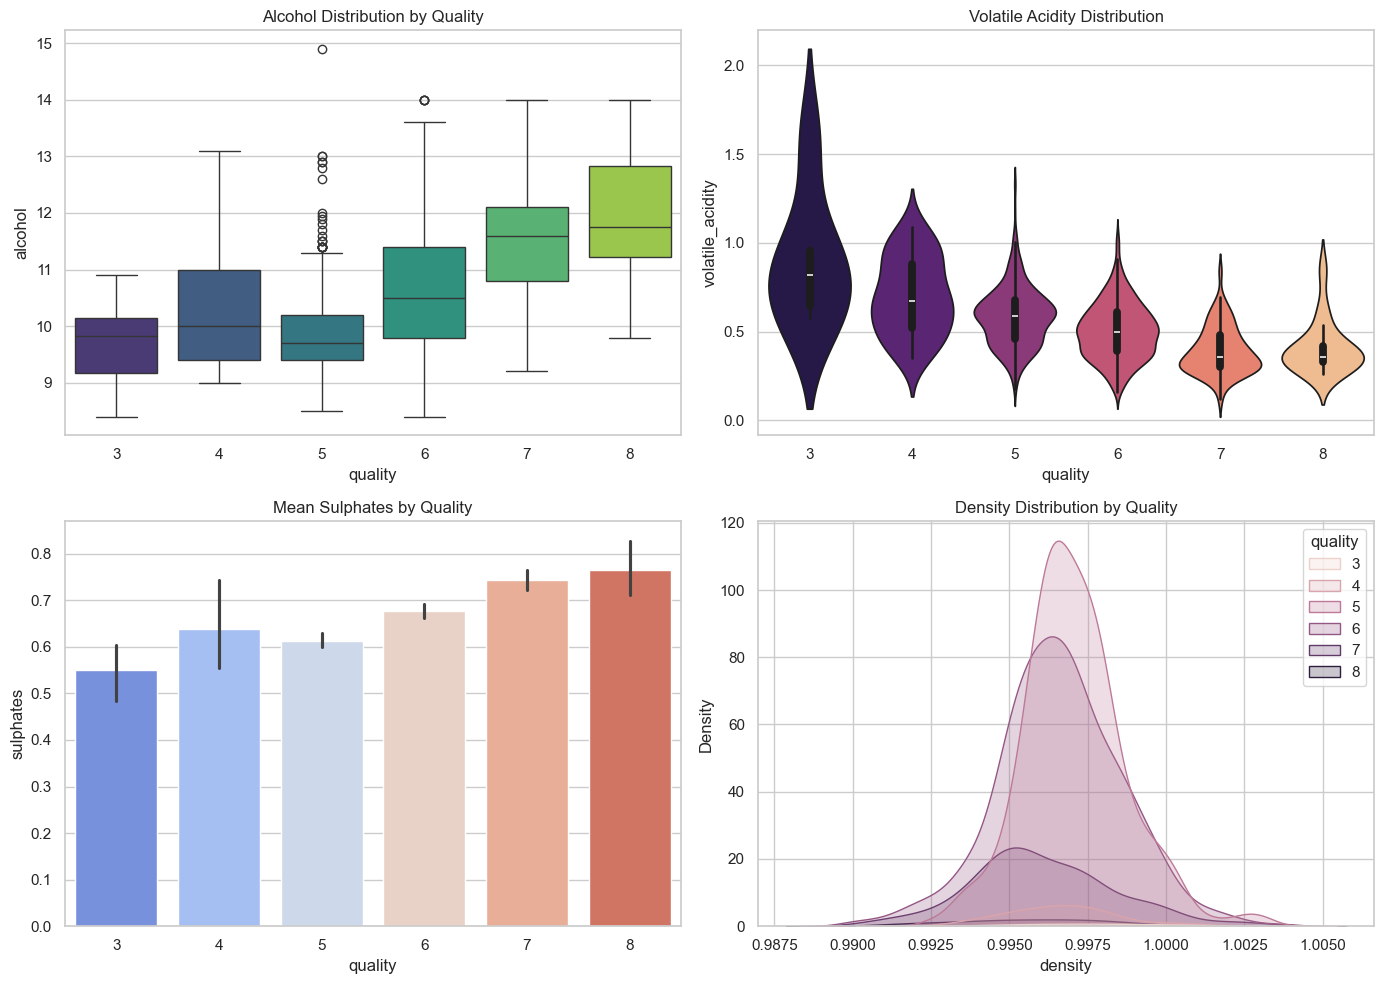

In [312]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(14,10))
sns.boxplot(x='quality', y='alcohol', data=df, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Alcohol Distribution by Quality')
sns.violinplot(x='quality', y='volatile_acidity', data=df, ax=axes[0,1], palette='magma')
axes[0,1].set_title('Volatile Acidity Distribution')
sns.barplot(x='quality', y='sulphates', data=df, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Mean Sulphates by Quality')
sns.kdeplot(data=df, x='density', hue='quality', fill=True, ax=axes[1,1])
axes[1,1].set_title('Density Distribution by Quality')
plt.tight_layout()
plt.show()